In [1]:
from util.bandit_util import StochasticGaussianArmAcquiringMachine, StandardBanditMachine, GaussianBanditArm, BernoulliBanditArm
from algorithms.eps_greedy import eps_greedy, decay_eps_greedy
from algorithms.etc import etc
from algorithms.ucb import ucb_basic, auer, ucb_AO, ucb_fast, ucb_faster
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [28]:
num_rounds = 10000

acquire_probability = 0.02
min_mean = 0.1
max_mean = 0.9
min_var = 0.01
max_var = 0.05

bandit_machine = StochasticGaussianArmAcquiringMachine(acquire_probability, min_mean, max_mean, min_var, max_var)
bandit_machine.insert_arm(bandit_machine.generate_arm())
bandit_machine.insert_arm(bandit_machine.generate_arm())

In [29]:
num_trials = 10
# # UCB test
print("Running UCB tests")
ucb_alg = ucb_basic(bandit_machine, num_rounds)
ucb_regret, ucb_reward, ucb_exp_reward, ucb_best_exp_reward = ucb_alg.run_experiment(num_trials, num_rounds)

# # AUER test
print("Running AUER tests")
auer_alg = auer(bandit_machine)
auer_regret, auer_reward, auer_exp_reward, auer_best_exp_reward = auer_alg.run_experiment(num_trials, num_rounds)

# # UCB - Asymptotically Optimal
print("Running UCB AO tests")
ucbao_alg = ucb_AO(bandit_machine)
ucbao_regret, ucbao_reward, ucbao_exp_reward, ucbao_best_exp_reward = ucbao_alg.run_experiment(num_trials, num_rounds)

# # eps-greedy test
print("Running eps greedy tests")
initial_eps = 1.0
epsg_alg = eps_greedy(bandit_machine, initial_eps)
epsg_regret, epsg_reward, epsg_exp_reward, epsg_best_exp_reward = epsg_alg.run_experiment(num_trials, num_rounds)

# decay eps-greedy test
print("Running decay eps greedy tests")
decay_factor = 0.99
depsg_alg = decay_eps_greedy(bandit_machine, initial_eps, decay_factor)
depsg_regret, depsg_reward, depsg_exp_reward, depsg_best_exp_reward = depsg_alg.run_experiment(num_trials, num_rounds)

Running UCB tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running AUER tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running UCB AO tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running eps greedy tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running decay eps greedy tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


In [30]:
# UCB_fast - Asymptotically Optimal
print("Running UCB Fast tests")
ucbfast_algo = ucb_fast(bandit_machine,power=5)
ucbfast_regret, ucbfast_reward, ucbfast_exp_reward, ucbfast_best_exp_reward = ucbfast_algo.run_experiment(num_trials, num_rounds)

print("Running UCB Fast tests")
ucbfaster_algo = ucb_faster(bandit_machine)
ucbfaster_regret, ucbfaster_reward, ucbfaster_exp_reward, ucbfaster_best_exp_reward = ucbfaster_algo.run_experiment(num_trials, num_rounds)


# etc
explore_rounds = 10
etc_alg = etc(bandit_machine, explore_rounds)
etc_regret, etc_reward, etc_exp_reward, etc_best_exp_reward = etc_alg.run_experiment(num_trials, num_rounds)

Running UCB Fast tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
Running UCB Fast tests
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9


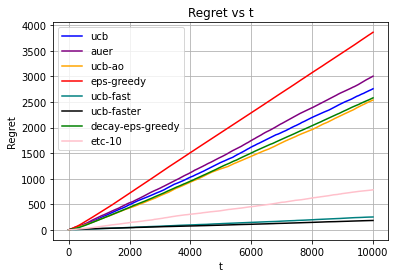

In [31]:
plt.plot(ucb_regret, 'b', label="ucb")
plt.plot(auer_regret, 'purple', label="auer")
plt.plot(ucbao_regret, 'orange', label="ucb-ao")
plt.plot(epsg_regret, 'r', label="eps-greedy")
plt.plot(ucbfast_regret, 'teal', label="ucb-fast")
plt.plot(ucbfaster_regret, 'black', label="ucb-faster")
plt.plot(depsg_regret, 'g', label="decay-eps-greedy")
plt.plot(etc_regret, 'pink', label="etc-10")

plt.xlabel('t')
plt.ylabel('Regret')
plt.title('Regret vs t')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
for i in range(1,100):
    delta = 1/(100)**2
#     delta = 1.0 + i * (np.log(i))**2
#     print(delta)
#     print(np.log(1/delta))
    print(np.sqrt((2.0 * np.log(1/delta))/i))

4.291932052578694
1.0729830131446736
0.47688133917541053
0.2682457532861684
0.17167728210314778
0.11922033479385263
0.08759045005262642
0.0670614383215421
0.0529868154639345
0.042919320525786946
0.03547051283122888
0.02980508369846316
0.025396047648394645
0.021897612513156604
0.01907525356701642
0.016765359580385525
0.014850975960479912
0.013246703865983625
0.01188900845589666
0.010729830131446736
0.009732272228069603
0.00886762820780722
0.008113293105063694
0.00745127092461579
0.006867091284125912
0.006349011912098661
0.005887423940437167
0.005474403128289151
0.005103367482257663
0.004768813391754105
0.004466110356481472
0.004191339895096381
0.003941168092358765
0.003712743990119978
0.003503618002105057
0.0033116759664959063
0.0031350855022488637
0.002972252113974165
0.002821783072043849
0.002682457532861684
0.0025532016969534175
0.002433068057017401
0.0023212179840879908
0.002216907051951805
0.00211947261855738
0.0020283232762659236
0.00194292985630543
0.0018628177311539474
0.0017875

In [27]:
for i in range(1,100):
    delta = 1/(100)**2
    delta = np.log(1.0 + i * (np.log(i)))
#     print(delta)
#     print(np.log(1/delta))
    print(np.sqrt((2.0 * delta)/(i)**2))

0.0
0.2901307088050591
0.2916026592796902
0.259919231980714
0.2295902256941662
0.2044222054808093
0.18390333695432715
0.16705487096238208
0.1530425709304479
0.141232706671337
0.13115451900148675
0.1224572257839972
0.11487646151273818
0.10821021408920112
0.102301923232585
0.09702859877298489
0.09229239109602556
0.08801453636299417
0.08413094891877103
0.08058896952442998
0.07734493507607153
0.07436233983411597
0.07161042803060695
0.06906310494256579
0.06669808581823657
0.06449622440476664
0.062440978496216985
0.06051798103255724
0.05871469324979623
0.05702012215978719
0.05542458887158875
0.05391953739834451
0.05249737593266664
0.051151344335785526
0.049875402924635485
0.04866413866639931
0.04751268568119312
0.04641665756840038
0.04537208955321036
0.044375388828721544
0.04342329176909902
0.04251282692845666
0.04164128293180938
0.04080618051885966
0.04000524812641773
0.03923640049698856
0.03849771988421673
0.037787439494155174
0.03710392885761803
0.036445680875481834
0.03581130031753235
0.